In [1]:
# Imports
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import peakutils 

In [2]:
from math import factorial
def savitzky_golay(y, window_size, order, deriv=0, rate=1):

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except (ValueError, msg):
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

## 410nm Graphs and Peak Difference

In [3]:
df = pd.read_csv('HD_656_3.csv')
df.columns=['ds','nA']
df = df[df.ds > 180]
df = df.reset_index(drop = True)
df.ds = df.ds - df.ds[0]


In [4]:
yhat=savitzky_golay(np.asarray(df.nA),30001,3)
df['yhat'] = yhat

In [5]:
dfx = df[(df.ds < 40)]

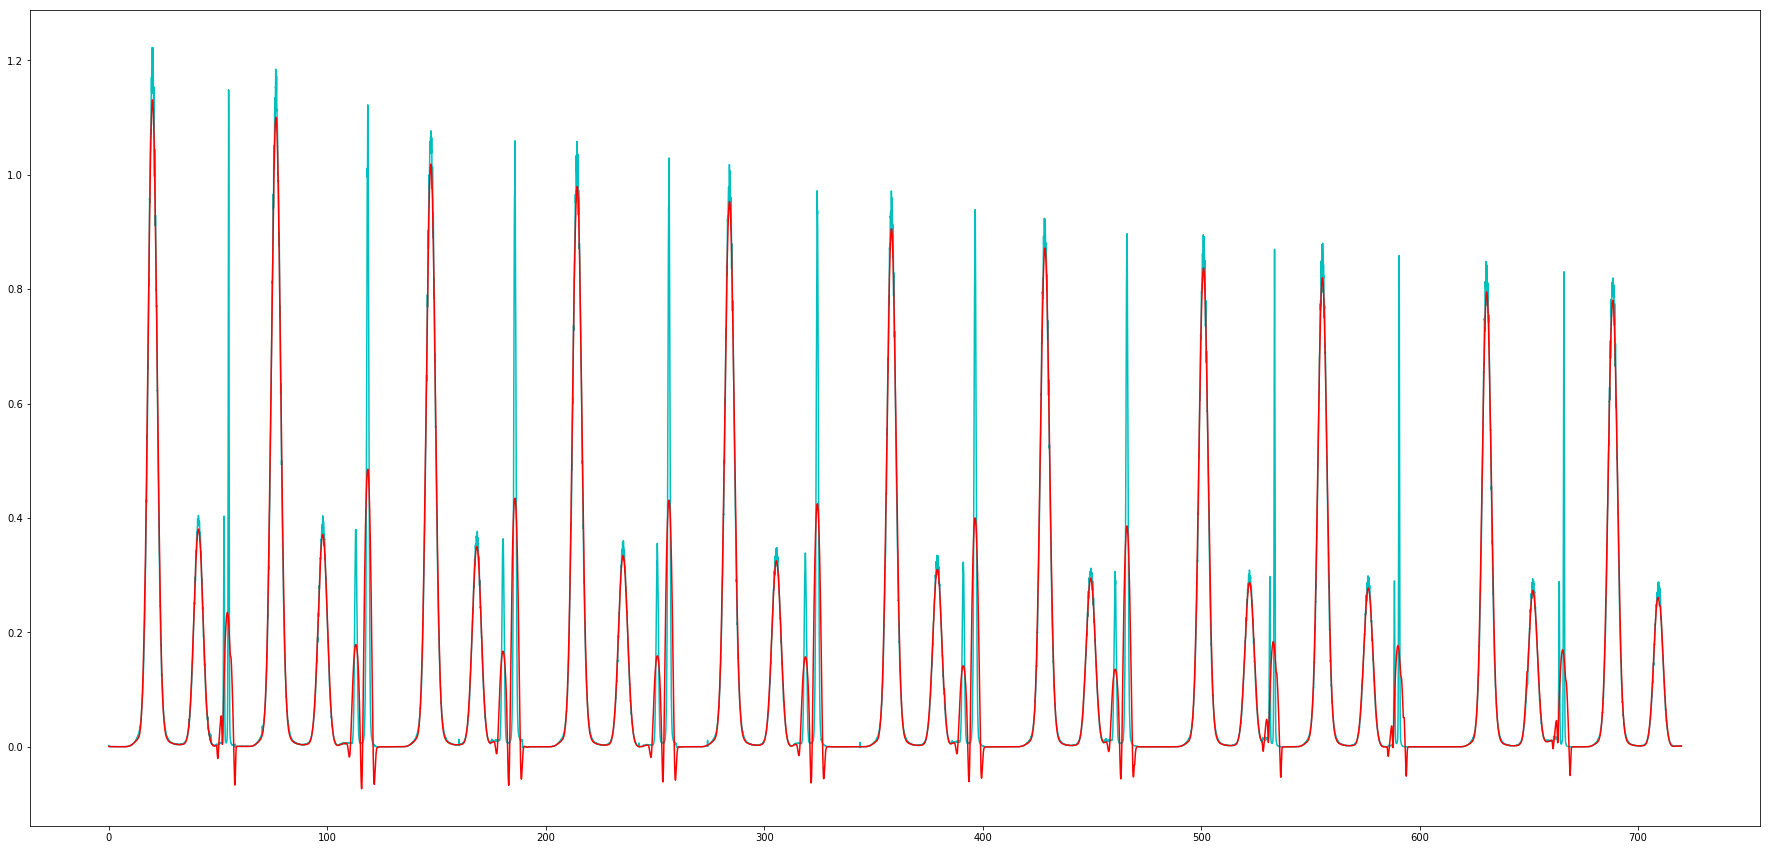

In [6]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(df.ds, df.nA, 'c')
plt.plot(df.ds, yhat, 'r')
plt.show()

Check peak fit close up


In [7]:
#plt.figure(figsize=(30,9))
#plt.plot(dfx.ds, dfx.nA, 'c')
#plt.plot(dfx.ds, dfx.yhat, 'r')
#plt.show()

In [ ]:
df656a = df656[(df656.ds < 750) & (df656.ds > 600)].reset_index(drop = True)

Find indexes where there is a peak using peakutil package

In [8]:
indexes = peakutils.indexes(yhat, thres=0.25, min_dist=10000)
xmax = [df.ds[i] for i in indexes]

In [9]:
print(indexes)

[  98958  202532  266903  376634  482973  585322  728689  833012  919450
 1060754 1164981 1269131 1406593 1513190 1605919 1774286 1878636 1963546
 2122400 2226649 2308909 2482177 2586807 2751602 2855590 3122801 3226574
 3407990 3510902]


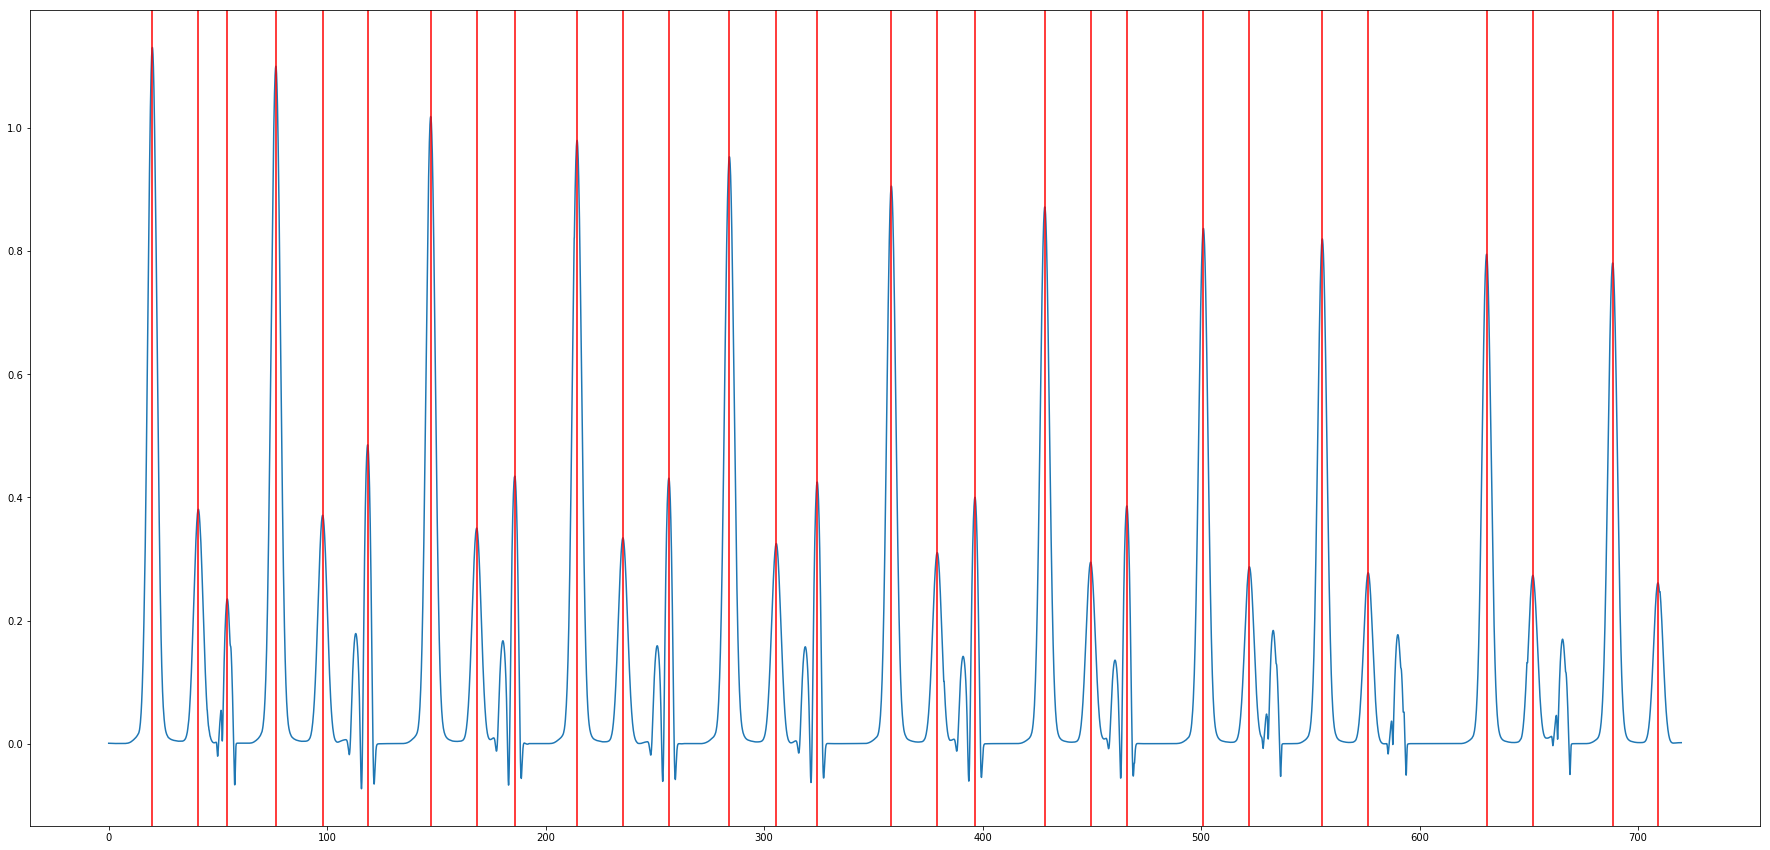

In [10]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(#df.ds, df.nA,
    df.ds, yhat)
for xc in xmax:
    plt.axvline(x=xc, color = 'r')
plt.show()

Peak detector finds correct peaks at :0,1,4,5,8,9

In [11]:
ind = 0,1,3,4,6,7,9,10,12,13

In [12]:
def transform(n):
    return 1.005*n+0.1375

In [13]:
xmax_2 = [xmax[i] for i in ind]

In [14]:
print([xmax[i] for i in ind])
print([transform(xmax[i]) for i in ind])

[19.971328, 41.017776, 76.50824, 97.91712000000001, 147.386816, 168.437864, 214.38603999999998, 235.37051199999996, 284.11116799999996, 305.570624]
[20.208684639999998, 41.36036488, 77.0282812, 98.5442056, 148.26125008, 169.41755331999997, 215.59547019999994, 236.68486455999994, 285.6692238399999, 307.23597712]


In [15]:
print(df.ds[0]-df.ds[1])
print(df.ds[1]-df.ds[2])
print(5000*(df.ds[2]-df.ds[3]))
## 5000 counts per second

print((df.ds[0] - df.ds[len(df.ds)-1])/(len(df.ds)))

1/4946

-0.0001999999999782176
-0.0002000000000066393
-1.0000000000331966
-0.00020205305330622437


0.0002021835826930853

Validation of correct peaks

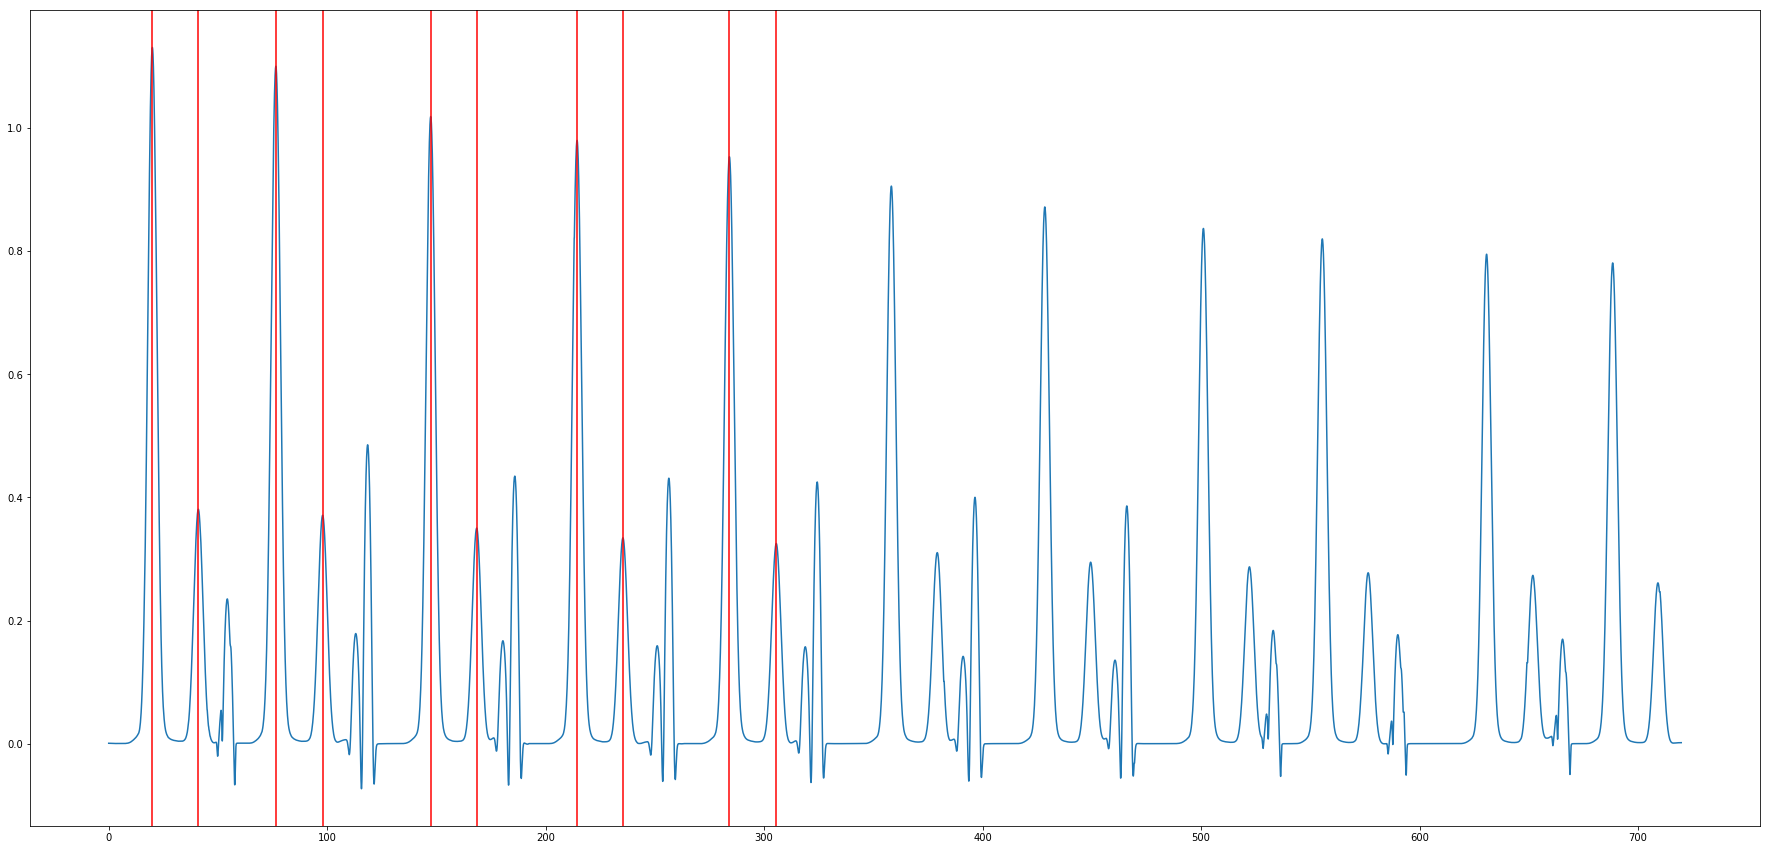

In [16]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(#df.ds, df.nA,
    df.ds, yhat)
xcoords = [0.22058956, 0.33088437, 2.20589566]
for xc in xmax_2:
    plt.axvline(x=xc, color = 'r')
plt.show()

In [17]:
xmax = [indexes[i] for i in ind]
dfpeaks = df.iloc[xmax_2].reset_index(drop = True)

In [18]:
dfpeaks

,ds,nA,yhat
0,0.003800,0.002327,0.000611
1,0.008200,0.002320,0.000611
2,0.015200,0.002308,0.000611
3,0.019400,0.002301,0.000611
4,0.029400,0.002285,0.000611
5,0.033600,0.002277,0.000611
6,0.043128,0.002262,0.000611
7,0.047328,0.002256,0.000611
8,0.057128,0.002250,0.000611
9,0.061328,0.002251,0.000612


In [19]:
dfpeaks

,ds,nA,yhat
0,0.003800,0.002327,0.000611
1,0.008200,0.002320,0.000611
2,0.015200,0.002308,0.000611
3,0.019400,0.002301,0.000611
4,0.029400,0.002285,0.000611
5,0.033600,0.002277,0.000611
6,0.043128,0.002262,0.000611
7,0.047328,0.002256,0.000611
8,0.057128,0.002250,0.000611
9,0.061328,0.002251,0.000612


Calculating isotope shifts

In [20]:
diff = []
for i in range(1,int(len(dfpeaks)/2) + 1):
    d = (dfpeaks.ds[i*2-1] - dfpeaks.ds[i*2-2])/12
    diff.append(d)
    


In [21]:
print(diff)
avg = sum(diff)/len(diff)
print([x*1.005 for x in diff])
#print(len(diff))


[0.0003666666666669964, 0.00034999999999977643, 0.00034999999999977643, 0.00034999999999977643, 0.00034999999999977643]
[0.00036850000000033134, 0.00035174999999977526, 0.00035174999999977526, 0.00035174999999977526, 0.00035174999999977526]


In [22]:
print(diff)
avg = sum(diff)/len(diff)

#print(len(diff))


[0.0003666666666669964, 0.00034999999999977643, 0.00034999999999977643, 0.00034999999999977643, 0.00034999999999977643]


In [23]:
import statistics
uc = statistics.stdev(diff)

In [24]:
IsotopeShift = (avg, "+/-" )

In [25]:
print(IsotopeShift)

(0.00035333333333322046, '+/-')


In [39]:
B3_2 = (abs(1.766-1.787)/1.787)*100
print('3->2', B3_2, "%")
B4_2 = (abs(1.301-1.324)/1.324)*100
print('4->2', B4_2, "%")
B5_2 = (abs(1.186-1.182)/1.182)*100
print('5->2', B5_2, "%")
B6_2 = (abs(1.103-1.069)/1.169)*100
print('6->2', B6_2, "%")
B7_2 = (abs(1.098-1.080)/1.080)*100
print('7->2', B7_2, "%")
B8_2 = (abs(1.062-1.059)/1.059)*100
print('8->2', B8_2, "%")

3->2 1.175153889199771 %
4->2 1.7371601208459313 %
5->2 0.33840947546531336 %
6->2 2.9084687767322523 %
7->2 1.666666666666668 %
8->2 0.28328611898018075 %


In [6]:
import math
math.sqrt(2)/5000

0.000282842712474619